In [1]:
import h5py
import numpy as np
import pandas as pd
import os
import seaborn as sns
from utils import DATA_DIR, load_annotations, plot_seq_overlap

TASK = 'enhancer_annotation'
H5_FILE = os.path.join(DATA_DIR, TASK, f'{TASK}.hdf5')

In [2]:
annotations = load_annotations(TASK)
annotations

,chromosome,start,end,gene,score,strand,split
0,10,104288458,104388554,ITPRIP,NaN,.,part2
1,1,180582042,180682138,XPR1,NaN,.,part9
2,11,263962,364058,IFITM1,NaN,.,part5
3,1,225377934,225478030,LBR,NaN,.,part9
4,1,247807202,247907298,TRIM58,NaN,.,part9
...,...,...,...,...,...,...,...
280,19,12619423,12719519,WDR83OS,NaN,.,part6
281,19,12888591,12988687,CALR,NaN,.,part6
282,3,129133800,129233896,CNBP,NaN,.,part4
283,12,54369206,54469302,ITGA5,NaN,.,part5


Number of annotations with overlaps: 31.0
Total number of samples: 285
Percentage of annotations with overlaps: 10.88%


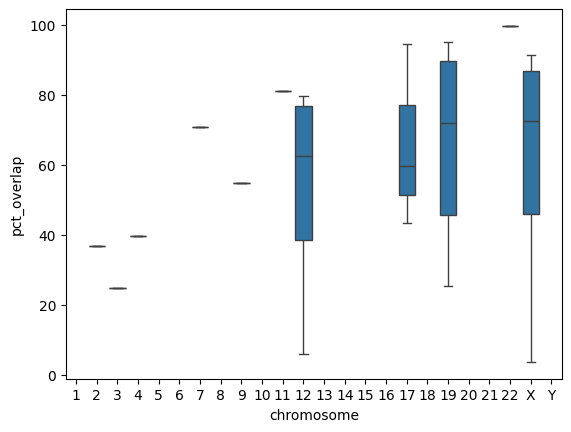

In [3]:
overlaps = plot_seq_overlap(annotations)

In [4]:
overlaps.describe()

,length,overlap,pct_overlap
count,31.0,31.000000,31.000000
mean,100096.0,62435.838710,62.375958
std,0.0,27492.351874,27.465985
min,100096.0,3624.000000,3.620524
25%,100096.0,43068.500000,43.027194
50%,100096.0,60161.000000,60.103301
75%,100096.0,88650.500000,88.565477
max,100096.0,99840.000000,99.744246


In [6]:
len(annotations) == len(annotations['gene'].unique())

True

In [7]:
annotations['length'] = annotations['end'] - annotations['start']
annotations['length'].describe()

count       285.0
mean     100096.0
std           0.0
min      100096.0
25%      100096.0
50%      100096.0
75%      100096.0
max      100096.0
Name: length, dtype: float64

In [8]:
annotations['split'].value_counts()

split
part9     35
part10    33
part6     31
part5     28
part3     28
part4     28
part2     27
part1     27
part8     24
part7     24
Name: count, dtype: int64

Sequences are 100096 bp long, however the labels for each sequence are just 782.
The reason being that each label applies to a binned dna segment of 128 bp. The label will be 1 if the binned segment contains at least 1 nucleotide lying in the enhancer element, 0 otherwise.

<Axes: >

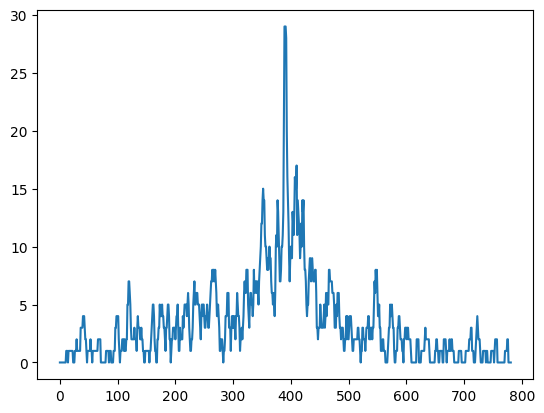

In [9]:
# Occurrence of enhancers across dna sequence positions

labels_data = np.array(h5py.File(H5_FILE, 'r')['labels'])
enhancers_spread = labels_data.sum(axis=0)
enhancers_spread

sns.lineplot(enhancers_spread)


The graph shows the distribution of 1 labels in the binned dna segments.